# Figures for the SAIL CMAC2.0 Technical Document

In [1]:
import os
import glob
import time
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
from matplotlib import colors

import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Processing Keywords

In [2]:
# Directory where the data are located
DATA_DIR = '/Users/jrobrien/ARM/data/CSU-XPrecipRadar/cmac2/'
# Desired Case for the following figures
CASE_FILE = 'gucxprecipradarcmacM1.c1.20220314-024759.nc'

In [3]:
# Easier to check variable names with xarray
ds = xr.open_dataset(DATA_DIR + CASE_FILE)

In [4]:
ds

<xarray.Dataset>
Dimensions:                                   (time: 9016, range: 668, sweep: 8)
Coordinates:
  * time                                      (time) datetime64[ns] 2022-03-1...
  * range                                     (range) float32 306.9 ... 4.029...
    azimuth                                   (time) float32 ...
    elevation                                 (time) float32 ...
Dimensions without coordinates: sweep
Data variables: (12/46)
    DBZ                                       (time, range) float64 ...
    VEL                                       (time, range) float64 ...
    WIDTH                                     (time, range) float64 ...
    ZDR                                       (time, range) float64 ...
    PHIDP                                     (time, range) float64 ...
    RHOHV                                     (time, range) float64 ...
    ...                                        ...
    longitude                                 float64 ...
    altitude                                  float64 ...
    time_coverage_start                       |S192 ...
    time_coverage_end                         |S192 ...
    time_reference                            |S192 ...
    volume_number                             int32 ...
Attributes: (12/24)
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    site_id:               guc
    facility_id:           C1
    comment:               This is highly experimental and initial data. Ther...
    attributions:          This data is collected by the ARM Climate Research...
    process_version:       CMAC 2.0
    ...                    ...
    datastream:            nsaxsaprcmacppiC1.c1
    location_description:  North Slope of Alaska (NSA), Barrow, Alaska
    doi:                   10.5439/1781398
    command_line:           cmac_sail.py 202203
    field_names:           DBZ, VEL, WIDTH, ZDR, PHIDP, RHOHV, NCP, DBZhv, cb...
    history:               created by rjackson on cirrus127.ccs.ornl.gov at 2...

### Figure 3: Radial Velocity Texture - 14 March 2022 case

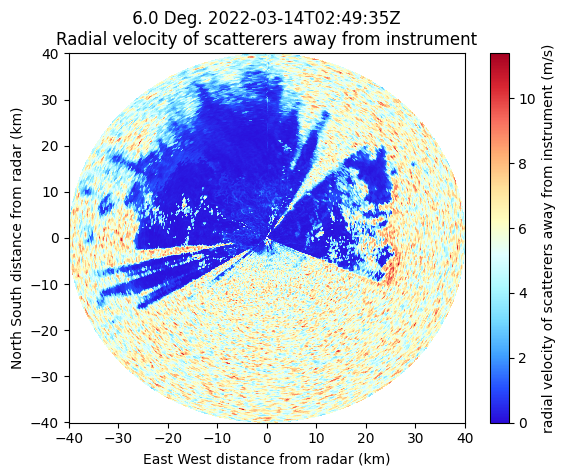

In [28]:
radar = pyart.io.read(DATA_DIR + CASE_FILE)
display = pyart.graph.RadarDisplay(radar)
display.plot('velocity_texture', sweep=3, vmin=0, cmap='pyart_BuDRd12')

### Figure 5: Gate ID - 14 March 2022 case

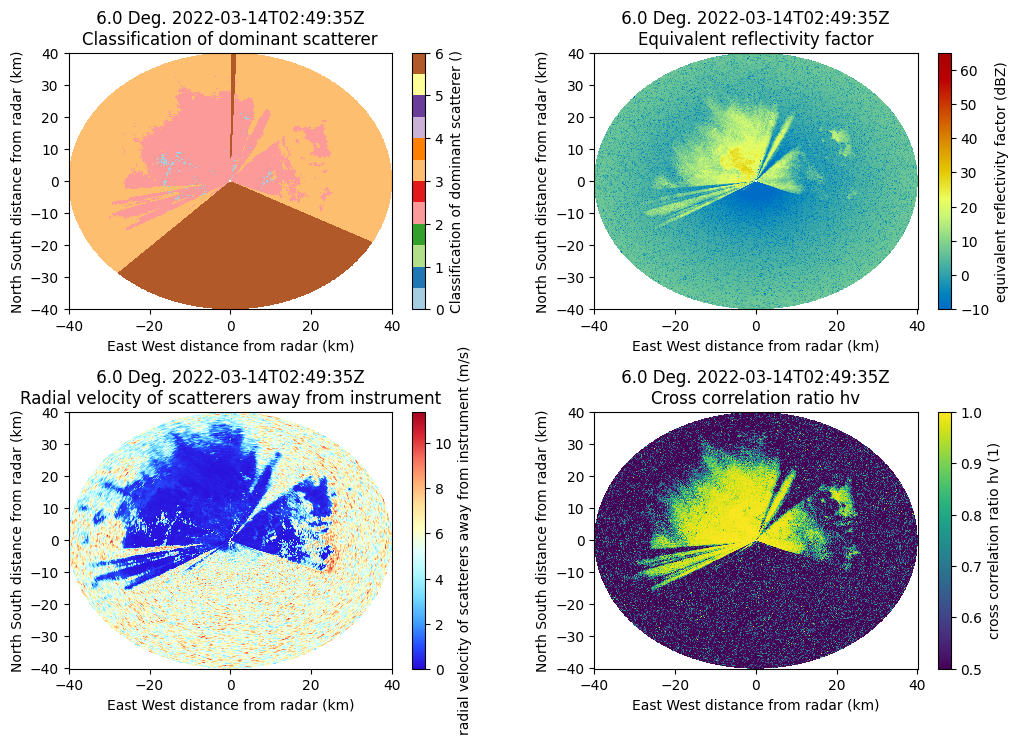

In [27]:
fig, axs = plt.subplots(2, 2, figsize=[12, 8])
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gate ID
px1 = display.plot('gate_id', sweep=3, cmap='Paired', ax=axs[0, 0])

# Equvialent Radar Reflectivity Factor
display.plot('DBZ', sweep=3, cmap='pyart_HomeyerRainbow', ax=axs[0, 1])

# Radial Velocity
display.plot('velocity_texture', sweep=3, vmin=0, cmap='pyart_BuDRd12', ax=axs[1, 0])

# Correlation Coefficient
display.plot('RHOHV', sweep=3, ax=axs[1, 1], vmin=0.5, vmax=1.0)


### Figure 6: Raw and De-aliased Radial Velocities 

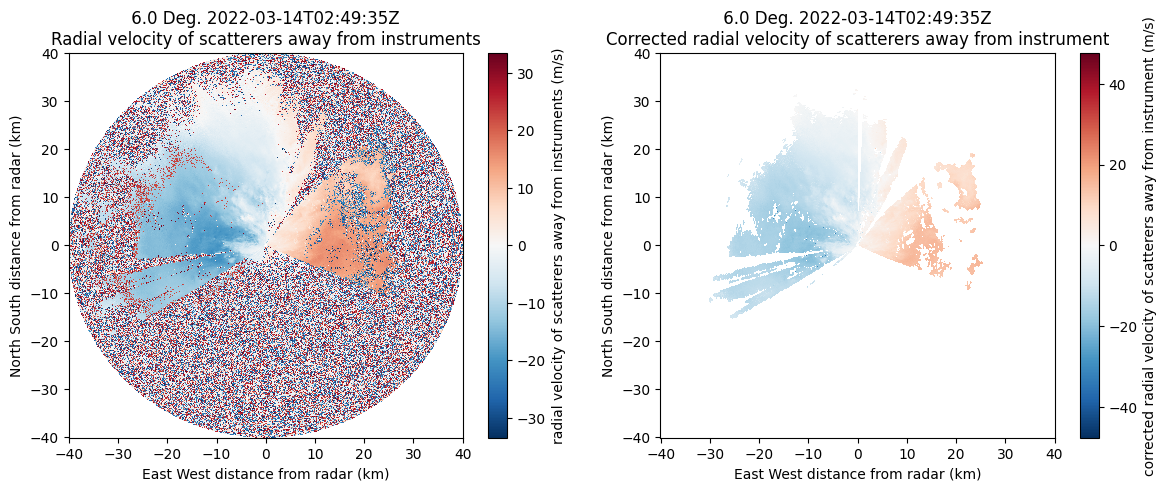

In [33]:
fig2, ax2 = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('VEL', sweep=3, ax=ax2[0], cmap='RdBu_r')

# Dealiased Radial Velocities
display.plot('corrected_velocity', sweep=3, ax=ax2[1], cmap='RdBu_r')

### Figure 7: LP Technique

### Figure 8: Uncorrected and Corrected Reflectivity

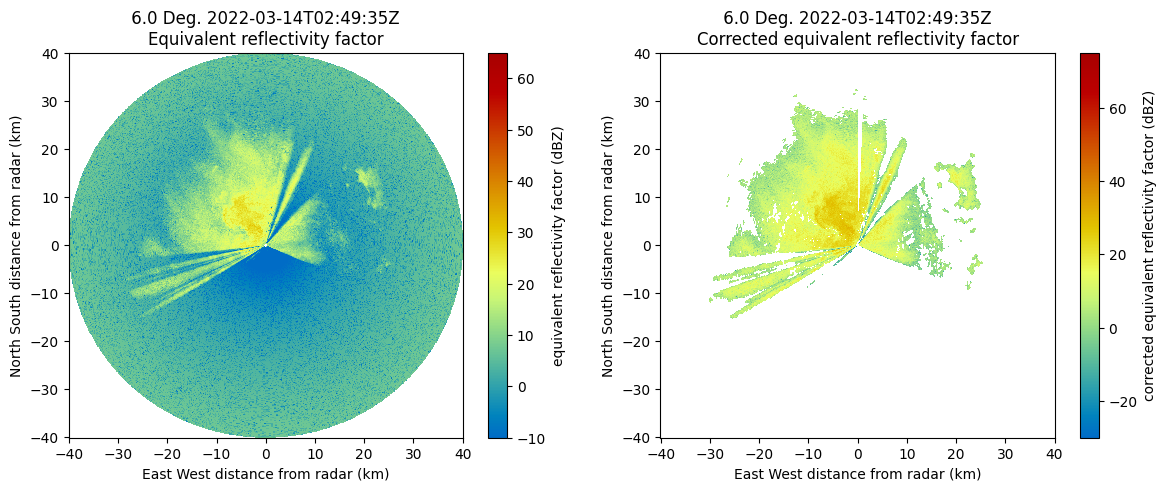

In [35]:
fig3, ax3 = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('DBZ', sweep=3, ax=ax3[0], cmap='pyart_HomeyerRainbow')

# Dealiased Radial Velocities
display.plot('corrected_reflectivity', sweep=3, ax=ax3[1], cmap='pyart_HomeyerRainbow')

### Figure 9: Uncorrected and Corrected Differential Reflectivity

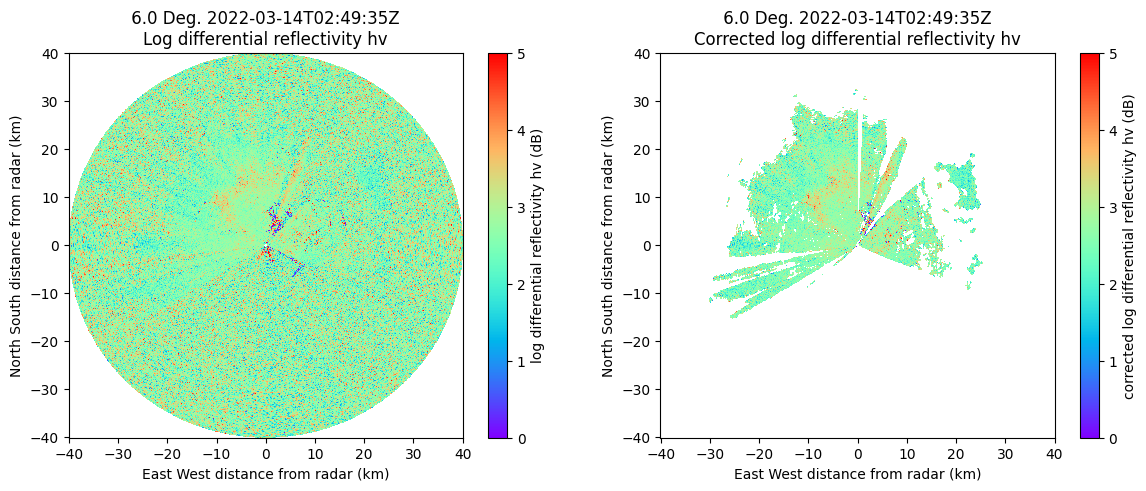

In [51]:
fig4, ax4 = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('ZDR', sweep=3, ax=ax4[0], vmin=0, vmax=5, cmap='rainbow')

# Dealiased Radial Velocities
display.plot('corrected_differential_reflectivity', vmin=0, vmax=5, sweep=3, ax=ax4[1], cmap='rainbow')

### Figure 10: Estimated Snowfall Rates

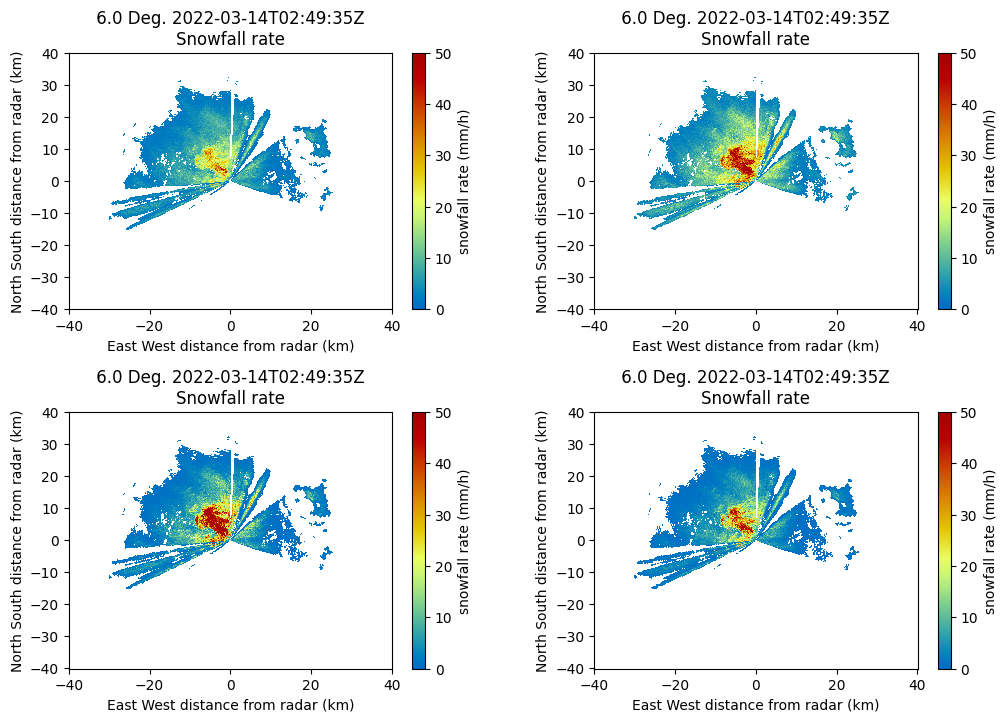

In [50]:
fig4, axC = plt.subplots(2, 2, figsize=[12, 8])
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gate ID
px1 = display.plot('snow_rate_ws2012', sweep=3, vmin=0, vmax=50, cmap='pyart_HomeyerRainbow', ax=axC[0, 0])

# Equvialent Radar Reflectivity Factor
display.plot('snow_rate_ws88diw', sweep=3, vmin=0, vmax=50, cmap='pyart_HomeyerRainbow', ax=axC[0, 1])

# Radial Velocity
display.plot('snow_rate_m2009_1', sweep=3, vmin=0, vmax=50, cmap='pyart_HomeyerRainbow', ax=axC[1, 0])

# Correlation Coefficient
display.plot('snow_rate_m2009_2', sweep=3, cmap='pyart_HomeyerRainbow', ax=axC[1, 1], vmin=0, vmax=50)
